In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [16]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [18]:
from sklearn.tree import DecisionTreeClassifier
CLF = DecisionTreeClassifier(ccp_alpha=0.01)
CLF= CLF.fit(X_train,Y_train)

In [19]:
CLF.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
predictions = CLF.predict(X_test)

CLF.predict_proba(X_test)

array([[0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.99193548, 0.00806452],
       [0.25      , 0.75      ],
       [0.99193548, 0.00806452],
       [0.99193548, 0.00806452],
       [0.03389831, 0.96610169],
       [0.99193548, 0.00806452],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.99193548, 0.00806452],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.99193548, 0.00806452],
       [0.99193548, 0.00806452],
       [0.03389831, 0.96610169],
       [0.99193548, 0.00806452],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.99193548, 0.00806452],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.03389831, 0.96610169],
       [0.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.95      0.95      0.95       121

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



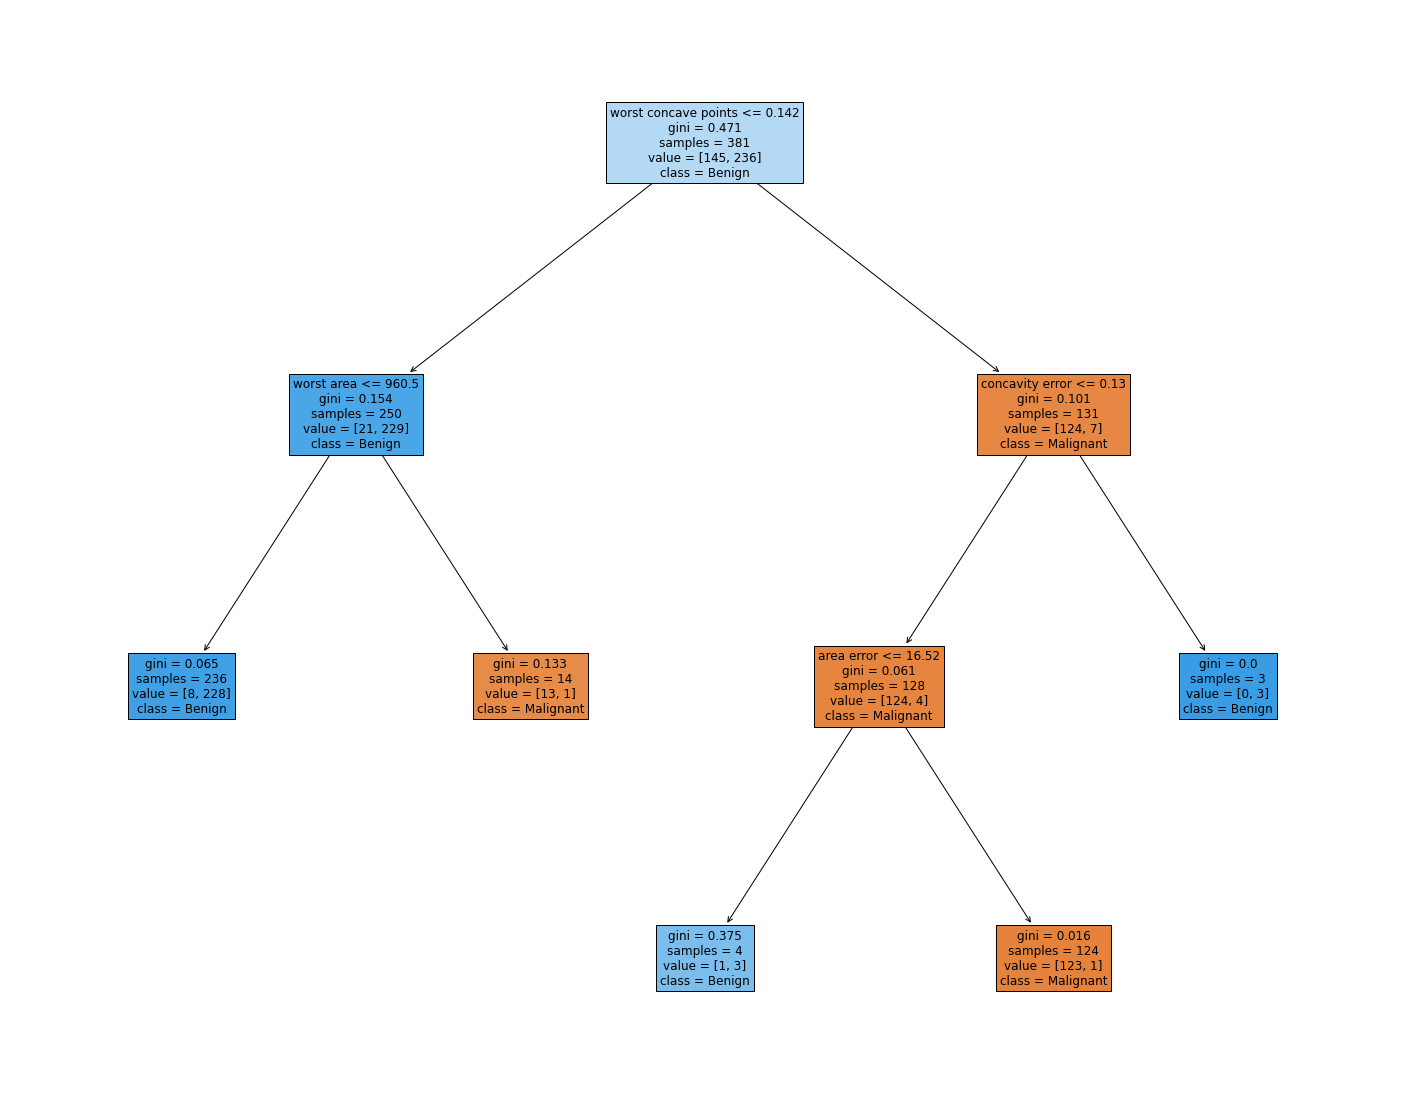

In [22]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(CLF,
                   feature_names=X.columns,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)